# Rezges-Lenges szimulacio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Egyszeru mozgasegyenlet-megoldo

In [2]:
def lepes(xn, vn, m, F, dt):
    a = F(xn, vn, m) / m
    v_new = vn + a*dt
    x_new = xn + v_new*dt
    return (x_new, v_new)

In [3]:
# Globalis valtozok
# 3D np.array elrendezese: x, y, z (z a fuggoleges irany)

# Rugoallando
D = 10.0

# Inga
L = 0.5
G = np.array([0,0,-9.81], dtype=np.float64)

# 3D rugo
def F_rugo(r, v, m):
    return (-D*r)

# 3D inga
def F_inga(r, v, m):
    # gravitacios ero:
    F_erinto = m * G * np.sin(r/L)
    return (F_erinto)

C_lin = 1.0

# 3D rugo linearis kozegellenallassal
def F_rugo_kozeg_lin(r, v, m):
    F = F_rugo(r, v, m) - C_lin*v
    return F

# 3D rugos-inga
def F_rugos_inga(r, v, m):
    F = F_rugo(r, v, m) + F_inga(r, v, m)
    return F

# 3D rugos-inga kozegellenallassal
def F_rugos_inga_kozeg(r, v, m):
    F = F_rugo_kozeg_lin(r, v, m) + F_inga(r, v, m)
    return F

Text(0, 0.5, 'v_x(t)')

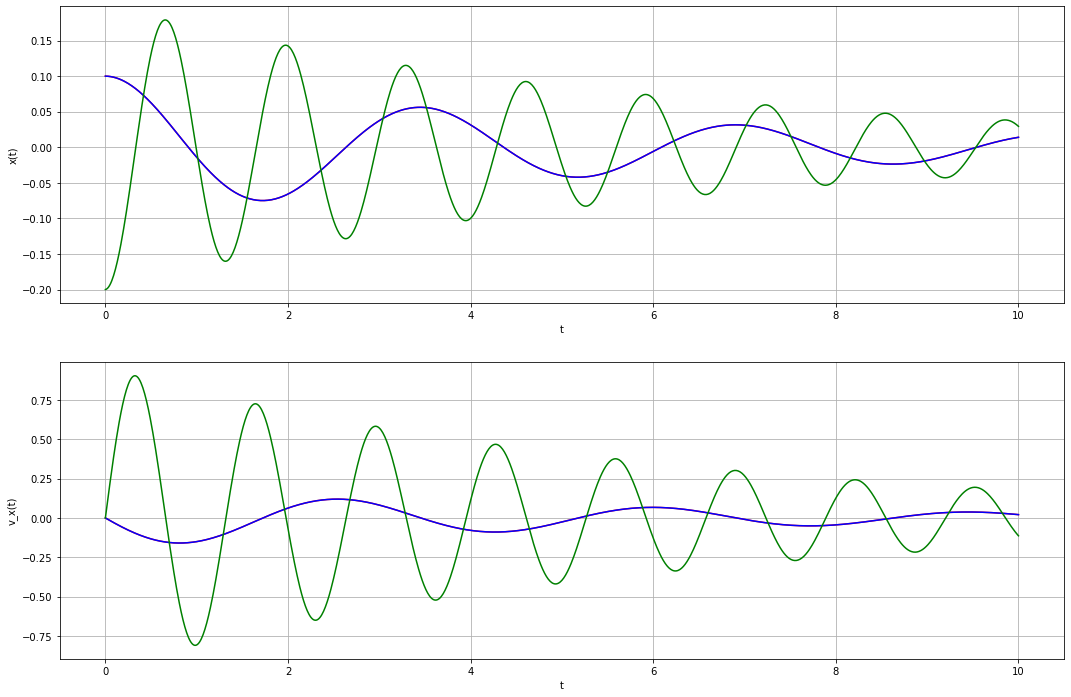

In [4]:
x0 = np.array([0.1,0.1,-0.2], dtype=np.float64)
v0 = np.array([0,0,0], dtype=np.float64)
dt = 0.01
m = 3.0

F_fuggveny = F_rugos_inga_kozeg # erofuggveny kivalasztasa

x = x0; v = v0
t = 0.0; t_max = 10.0

t_list = []
x_list = []
v_list = []

# szamitas
while(t<=t_max+1e-6):
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)
    x, v = lepes(x, v, m, F_fuggveny, dt)
    t += dt
    
# tömbbé alakítjuk
x_arr=np.asarray(x_list)
v_arr=np.asarray(v_list)
t_arr=np.asarray(t_list)

# most kirajzoljuk
fig=plt.figure(figsize=(18,12))  
ax1=fig.add_subplot(211) # két rész-grafikon
ax2=fig.add_subplot(212)
ax1.plot(t_list, x_arr[:,0], color="red") # az elsőbe az rx(t)
ax1.plot(t_list, x_arr[:,1], color="blue")
ax1.plot(t_list, x_arr[:,2], color="green")
ax2.plot(t_list, v_arr[:,0], color="red")# a másodikba a vx(t)
ax2.plot(t_list, v_arr[:,1], color="blue")
ax2.plot(t_list, v_arr[:,2], color="green")
ax1.grid()
ax2.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v_x(t)")

Text(0.5, 0, 'z')

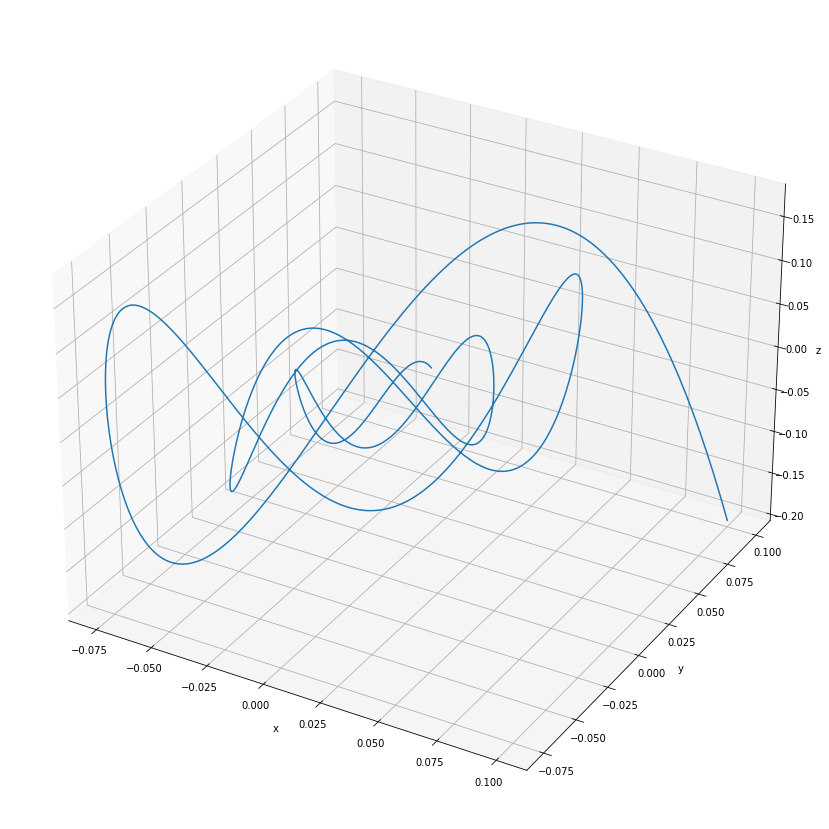

In [5]:
# 3D plot
fig2 = plt.figure(figsize=(15,15))
ax1 = fig2.add_subplot(111, projection='3d')
ax1.plot(x_arr[:,0], x_arr[:,1], x_arr[:,2])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')